<a href="https://colab.research.google.com/github/shaukathussain/postion-quality-sports-prediction/blob/main/position_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import pandas as pd
import tensorflow as tf
import re
import json


In [101]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [102]:
file = '/content/drive/MyDrive/timeseries/valid-data.json'
with open(file) as train_file:
    dict_train = json.load(train_file)


In [103]:
df = pd.json_normalize(dict_train[1:])

In [104]:
df

,timestamp,position.x,position.y,position.z,position.quality
0,1598152118006,-3.841946,7.926755,-0.033847,67
1,1598152118005,-9.076024,-4.477330,-0.058161,83
2,1598152118030,-3.685511,8.012804,-0.036006,86
3,1598152118080,-3.447886,8.039709,-0.068640,86
4,1598152118423,-2.924334,7.900291,0.162582,96
...,...,...,...,...,...
26027,1598154759585,22.784122,2.301751,2.445111,72
26028,1598154759789,16.489519,-1.801548,2.953061,94
26029,1598154759789,23.284721,2.977140,1.222459,90
26030,1598154759880,16.246746,-1.885520,2.427024,94


In [105]:
# date_time = pd.to_datetime(df['timestamp'], unit = 'ms')

In [106]:
date_time = pd.to_datetime(df.pop('timestamp'),unit = 'ms' )

In [107]:
df.columns

Index(['position.x', 'position.y', 'position.z', 'position.quality'], dtype='object')

In [108]:
date_time

0       2020-08-23 03:08:38.006
1       2020-08-23 03:08:38.005
2       2020-08-23 03:08:38.030
3       2020-08-23 03:08:38.080
4       2020-08-23 03:08:38.423
                  ...          
26027   2020-08-23 03:52:39.585
26028   2020-08-23 03:52:39.789
26029   2020-08-23 03:52:39.789
26030   2020-08-23 03:52:39.880
26031   2020-08-23 03:52:39.938
Name: timestamp, Length: 26032, dtype: datetime64[ns]

<Figure size 4500x3000 with 0 Axes>

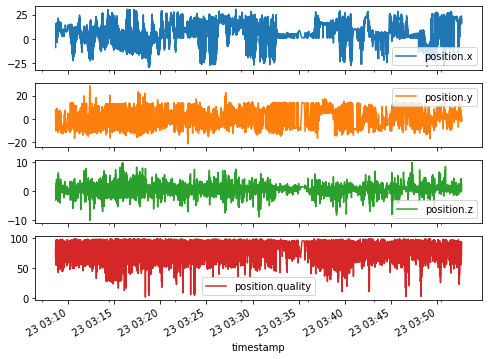

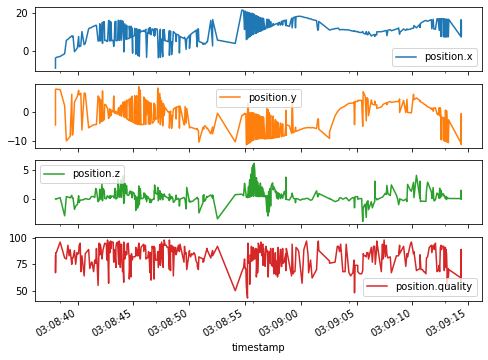

In [109]:
from matplotlib.pyplot import figure
figure(figsize=(30, 20), dpi=150)
plot_cols = ['position.x',	'position.y'	,'position.z',	'position.quality']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plot_features = df[plot_cols][0:400]
plot_features.index = date_time[0:400]
_ = plot_features.plot(subplots=True)

df.describe()

In [110]:
df.describe()

,position.x,position.y,position.z,position.quality
count,26032.000000,26032.000000,26032.000000,26032.000000
mean,5.364982,0.925692,0.585733,77.605947
std,11.668674,6.912533,1.214121,15.107464
min,-29.478020,-21.156071,-10.038864,2.000000
25%,-0.360913,-4.724915,0.031292,69.000000
50%,5.622491,0.809633,0.548526,81.000000
75%,15.323358,5.899458,1.068801,89.000000
max,30.545200,28.281576,9.851962,99.000000


(-29.47802, 30.5452, -21.156071, 28.281576)

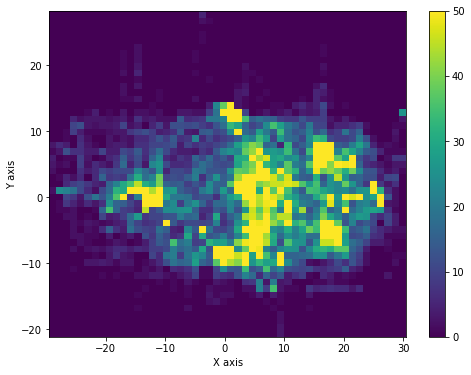

In [111]:
import matplotlib.pyplot as plt
plt.hist2d(df['position.x'], df['position.y'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('X axis')
plt.ylabel('Y axis')
ax = plt.gca()
ax.axis('tight')

(-29.47802, 30.5452, -10.038864, 9.8519621)

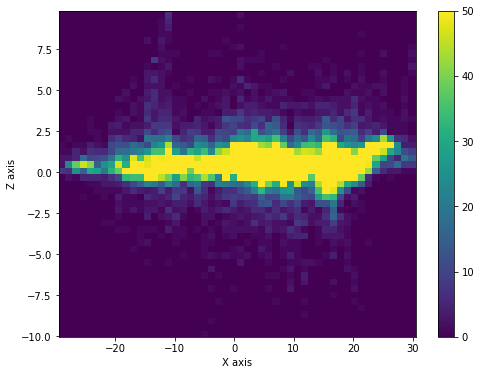

In [112]:
import matplotlib.pyplot as plt
plt.hist2d(df['position.x'], df['position.z'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('X axis')
plt.ylabel('Z axis')
ax = plt.gca()
ax.axis('tight')

(-10.038864, 9.8519621, -21.156071, 28.281576)

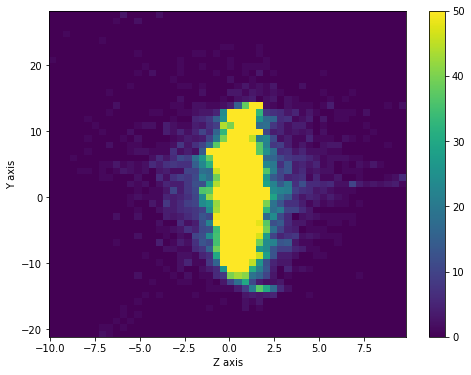

In [113]:
import matplotlib.pyplot as plt
plt.hist2d(df['position.z'], df['position.y'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('Z axis')
plt.ylabel('Y axis')
ax = plt.gca()
ax.axis('tight')

In [114]:
import os
import datetime
import numpy as np
# timestamp_s = date_time.map(datetime.datetime.timestamp)

(-29.47802, 30.5452, 2.0, 99.0)

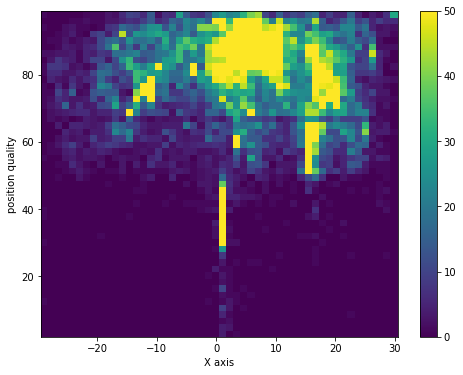

In [115]:
import matplotlib.pyplot as plt
plt.hist2d(df['position.x'], df['position.quality'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('X axis')
plt.ylabel('position quality')
ax = plt.gca()
ax.axis('tight')

(-21.156071, 28.281576, 2.0, 99.0)

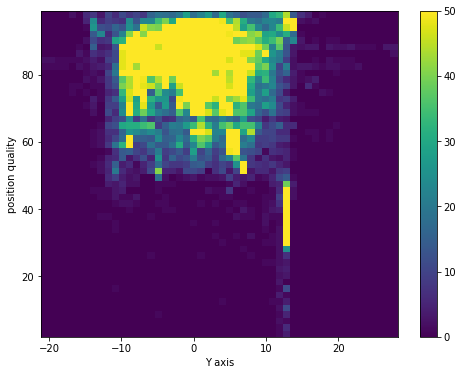

In [116]:
import matplotlib.pyplot as plt
plt.hist2d(df['position.y'], df['position.quality'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('Y axis')
plt.ylabel('position quality')
ax = plt.gca()
ax.axis('tight')

(-10.038864, 9.8519621, 2.0, 99.0)

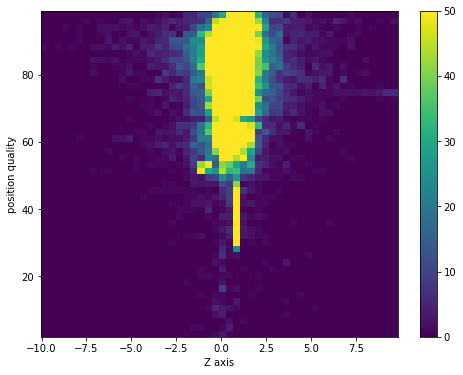

In [117]:
import matplotlib.pyplot as plt
plt.hist2d(df['position.z'], df['position.quality'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('Z axis')
plt.ylabel('position quality')
ax = plt.gca()
ax.axis('tight')

In [118]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [119]:
df.dtypes

position.x          float64
position.y          float64
position.z          float64
position.quality      int64
dtype: object

In [120]:
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

(-3.024535333917649,
 2.3259986758448097,
 -3.2260038781786577,
 4.106533281436916)

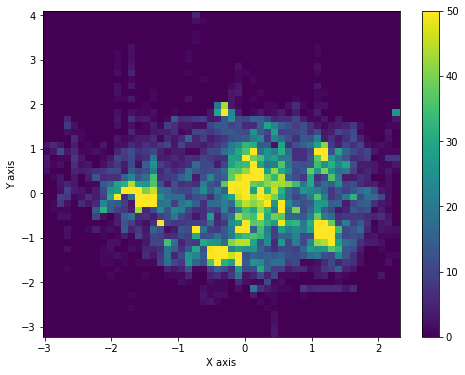

In [121]:
plt.hist2d(train_df['position.x'], train_df['position.y'], bins=(50, 50), vmax=50)
plt.colorbar()
plt.xlabel('X axis')
plt.ylabel('Y axis')
ax = plt.gca()
ax.axis('tight')

In [122]:
df.head()

,position.x,position.y,position.z,position.quality
0,-3.841946,7.926755,-0.033847,67
1,-9.076024,-4.477330,-0.058161,83
2,-3.685511,8.012804,-0.036006,86
3,-3.447886,8.039709,-0.068640,86
4,-2.924334,7.900291,0.162582,96


In [123]:
train_df.head()

,position.x,position.y,position.z,position.quality
0,-0.739308,1.087529,-0.526749,-0.715476
1,-1.205880,-0.752231,-0.547109,0.339058
2,-0.725363,1.100291,-0.528557,0.536784
3,-0.704181,1.104282,-0.555885,0.536784
4,-0.657511,1.083604,-0.362255,1.195868


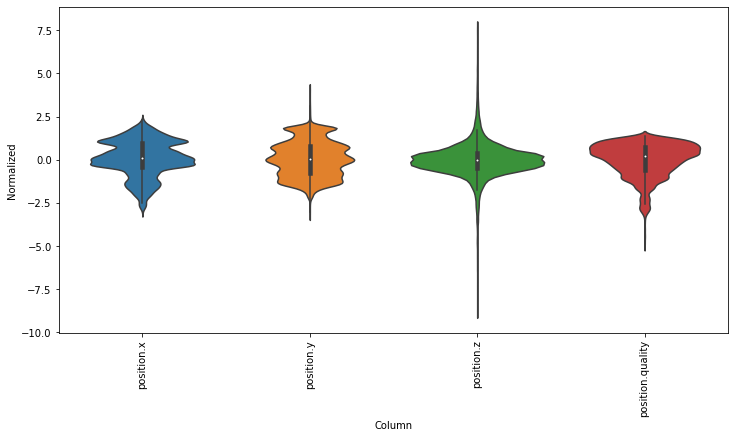

In [124]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [125]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [126]:
w1 = WindowGenerator(input_width=100, label_width=1, shift=100,
                     label_columns=['position.quality'])
#                      label_columns=['position.x', 'position.y', 'position.z', 'position.quality'])
w1

Total window size: 200
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [199]
Label column name(s): ['position.quality']

In [160]:
w2 = WindowGenerator(input_width=50, label_width=1, shift=25,
                     label_columns=['position.quality'])
#                      label_columns=['position.x', 'position.y', 'position.z', 'position.quality'])
w2

Total window size: 75
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Label indices: [74]
Label column name(s): ['position.quality']

In [128]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [129]:
#try it out 

In [130]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 75, 4)
Inputs shape: (3, 50, 4)
labels shape: (3, 1, 1)


In [131]:
# example_window

In [132]:
w2.example = example_inputs, example_labels

In [133]:
w2.example[0].shape


TensorShape([3, 50, 4])

In [134]:
w2.example[1].shape

TensorShape([3, 1, 1])

In [135]:
def plot(self, model=None, plot_col='position.quality', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [ms]')

WindowGenerator.plot = plot

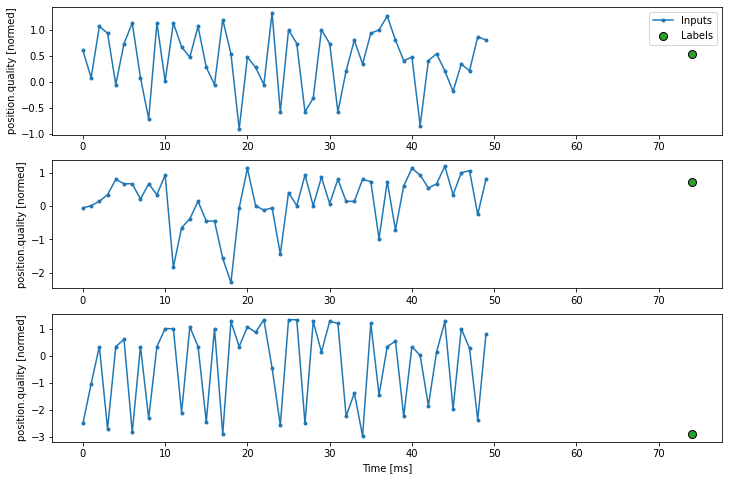

In [148]:
w2.plot()

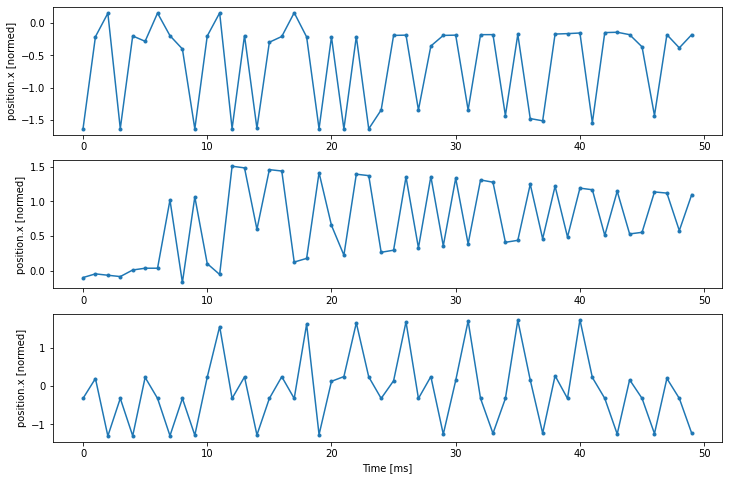

In [149]:
w2.plot(plot_col='position.x')

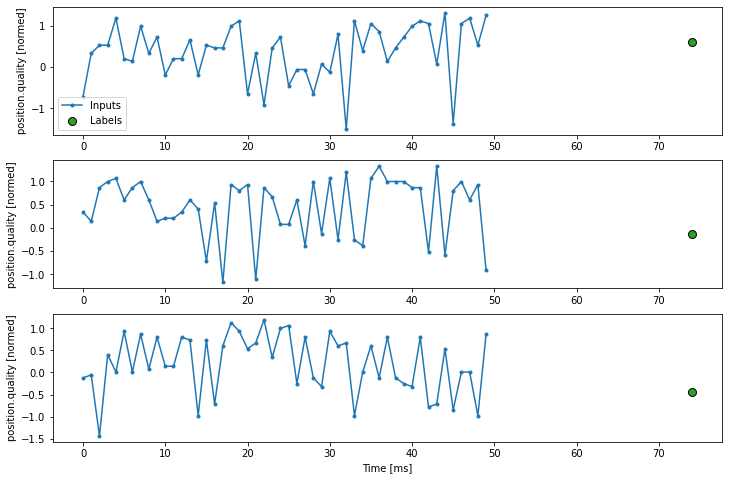

In [138]:
w2.plot(plot_col='position.quality')

In [139]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [150]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [151]:
w2.train.element_spec

(TensorSpec(shape=(None, 50, 4), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [155]:
for example_inputs, example_labels in w2.train.take(2):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 50, 4)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 50, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [158]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['position.quality'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['position.quality']

In [161]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [181]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:

      return inputs
    result = inputs[:, :, self.label_index]

    return result[:, :, tf.newaxis]

In [163]:
column_indices

{'position.quality': 3, 'position.x': 0, 'position.y': 1, 'position.z': 2}

In [182]:
baseline = Baseline(label_index=column_indices['position.quality'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)

performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

163/163 [==============================] - 1s 3ms/step - loss: 1.0160 - mean_absolute_error: 0.6814


In [183]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['position.quality'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['position.quality']

In [184]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 4)
Output shape: (32, 24, 1)


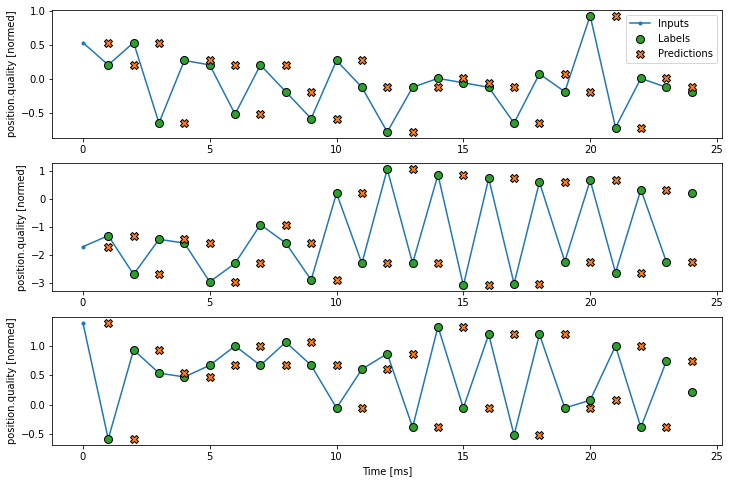

In [185]:
wide_window.plot(baseline)